In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook


In [2]:
# Importing the cleaned data

path = r'/Users/vineetasinha/Documents/Backups/Apr30/dataanalytics/tasks/Data-Immersion/Achievement 6/World Happiness Project'

In [3]:
path

'/Users/vineetasinha/Documents/Backups/Apr30/dataanalytics/tasks/Data-Immersion/Achievement 6/World Happiness Project'

In [4]:
df = pd.read_csv(os.path.join(path,'Data','Cleaned Data','FinalWHData.csv'))

In [5]:
df.describe()

,Unnamed: 0,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754781,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,0.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,78.500000,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,117.750000,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,157.000000,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [6]:
df = df.drop(columns=['Unnamed: 0'])


In [7]:
df.head(5)

,Country,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       158 non-null    object 
 1   Overall Rank                  158 non-null    int64  
 2   Happiness Score               158 non-null    float64
 3   Economy (GDP per Capita)      158 non-null    float64
 4   Family                        158 non-null    float64
 5   Life Expectancy               158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Absence of Corruption         158 non-null    float64
 8   Generosity                    158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


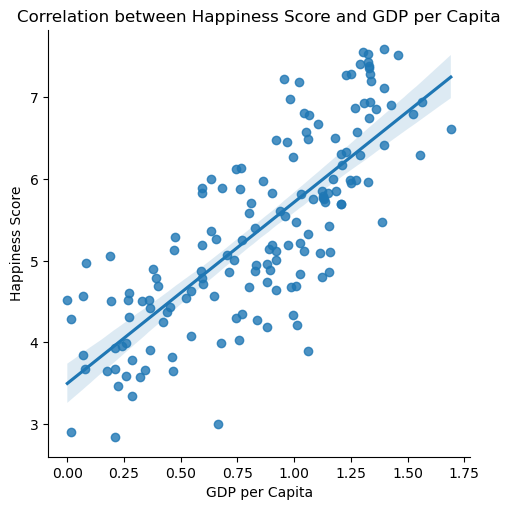

In [9]:
# Exploratory Visual Analysis
# Correlation between Economy vs Happiness Score

sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)
plt.title('Correlation between Happiness Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

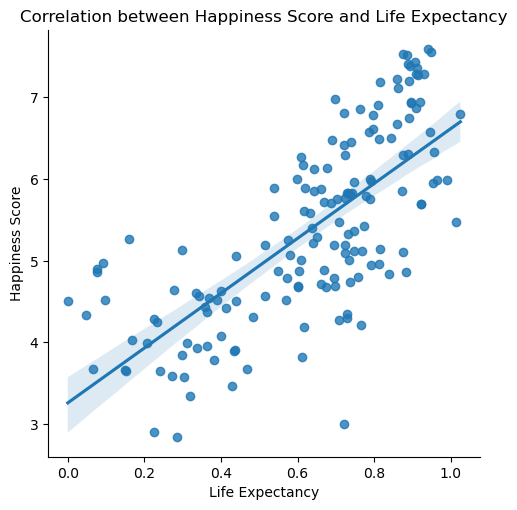

In [10]:
# Correlation between Life Expectancy vs Happiness Score


sns.lmplot(x='Life Expectancy', y='Happiness Score', data=df)
plt.title('Correlation between Happiness Score and Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

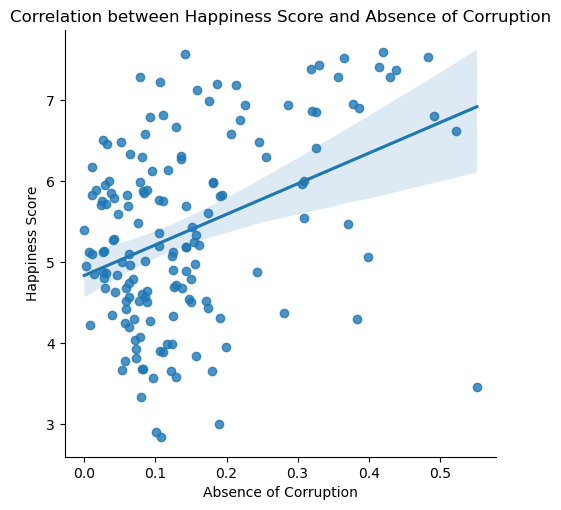

In [11]:
# Correlation between Absence of Corruption vs Happiness Score


sns.lmplot(x='Absence of Corruption', y='Happiness Score', data=df)
plt.title('Correlation between Happiness Score and Absence of Corruption')
plt.xlabel('Absence of Corruption')
plt.ylabel('Happiness Score')
plt.show()

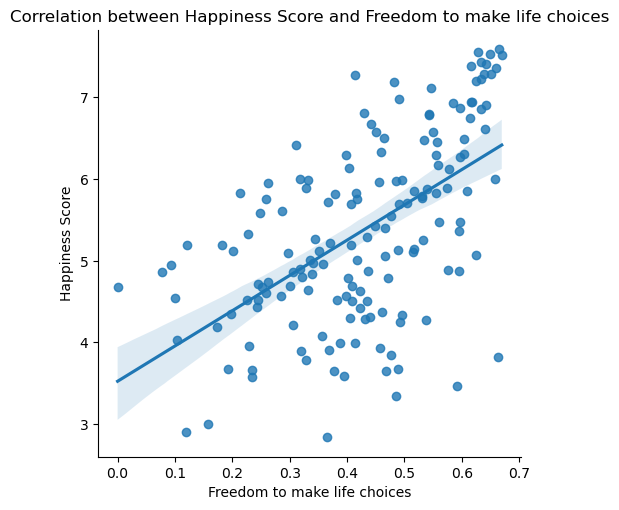

In [67]:
# Correlation between Freedom to make life choices vs Happiness Score

sns.lmplot(x='Freedom to make life choices', y='Happiness Score', data=df)
plt.title('Correlation between Happiness Score and Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.show()

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [13]:
correlation_matrix = numeric_df.corr()


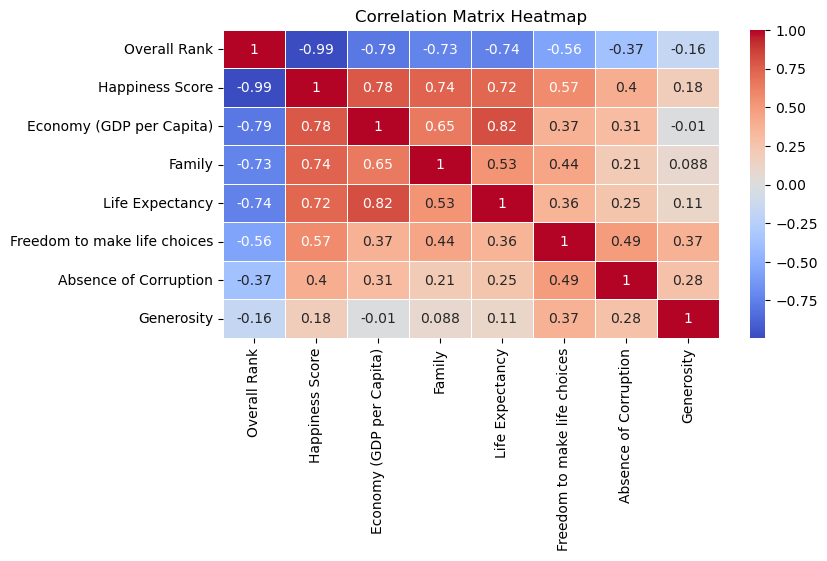

In [43]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# The correlation coefficients in the heatmap provide insights into how variables in the dataset are related.
# Dark Red (close to +1): Strong positive correlation.
# Dark Blue (close to -1): Strong negative correlation.
# White or light color (close to 0): Weak or no correlation.


In [16]:
# Scatterplot for variables with strongest correlation

The strongest positive correlation is between Life Expectancy and Economy (GDP per Capita) with a value of 0.816478003085699
The strongest negative correlation is between Overall Rank and Happiness Score with a value of -0.9921053148284925


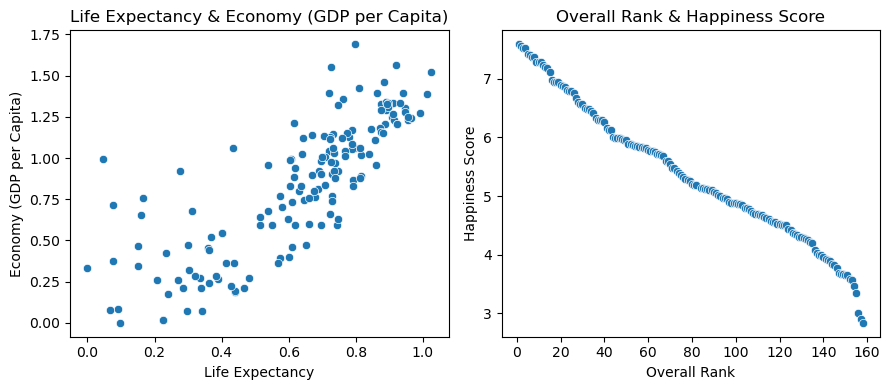

In [81]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix to identify the strongest correlations
# print(correlation_matrix)

# Find the pairs of variables with the highest positive and negative correlations
correlations = correlation_matrix.unstack().sort_values(ascending=False)
strongest_positive_correlation = correlations[correlations != 1].idxmax()
strongest_negative_correlation = correlations.idxmin()

# Print the strongest correlations
print(f"The strongest positive correlation is between {strongest_positive_correlation[0]} and {strongest_positive_correlation[1]} with a value of {correlation_matrix.loc[strongest_positive_correlation]}")
print(f"The strongest negative correlation is between {strongest_negative_correlation[0]} and {strongest_negative_correlation[1]} with a value of {correlation_matrix.loc[strongest_negative_correlation]}")

# Create scatter plots for the strongest correlations
plt.figure(figsize=(9, 4))

# Strongest positive correlation plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=df[strongest_positive_correlation[0]], y=df[strongest_positive_correlation[1]])
plt.title(f'{strongest_positive_correlation[0]} & {strongest_positive_correlation[1]}')
plt.xlabel(strongest_positive_correlation[0])
plt.ylabel(strongest_positive_correlation[1])

# Strongest negative correlation plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=df[strongest_negative_correlation[0]], y=df[strongest_negative_correlation[1]])
plt.title(f'{strongest_negative_correlation[0]} & {strongest_negative_correlation[1]}')
plt.xlabel(strongest_negative_correlation[0])
plt.ylabel(strongest_negative_correlation[1])

plt.tight_layout()
plt.show()

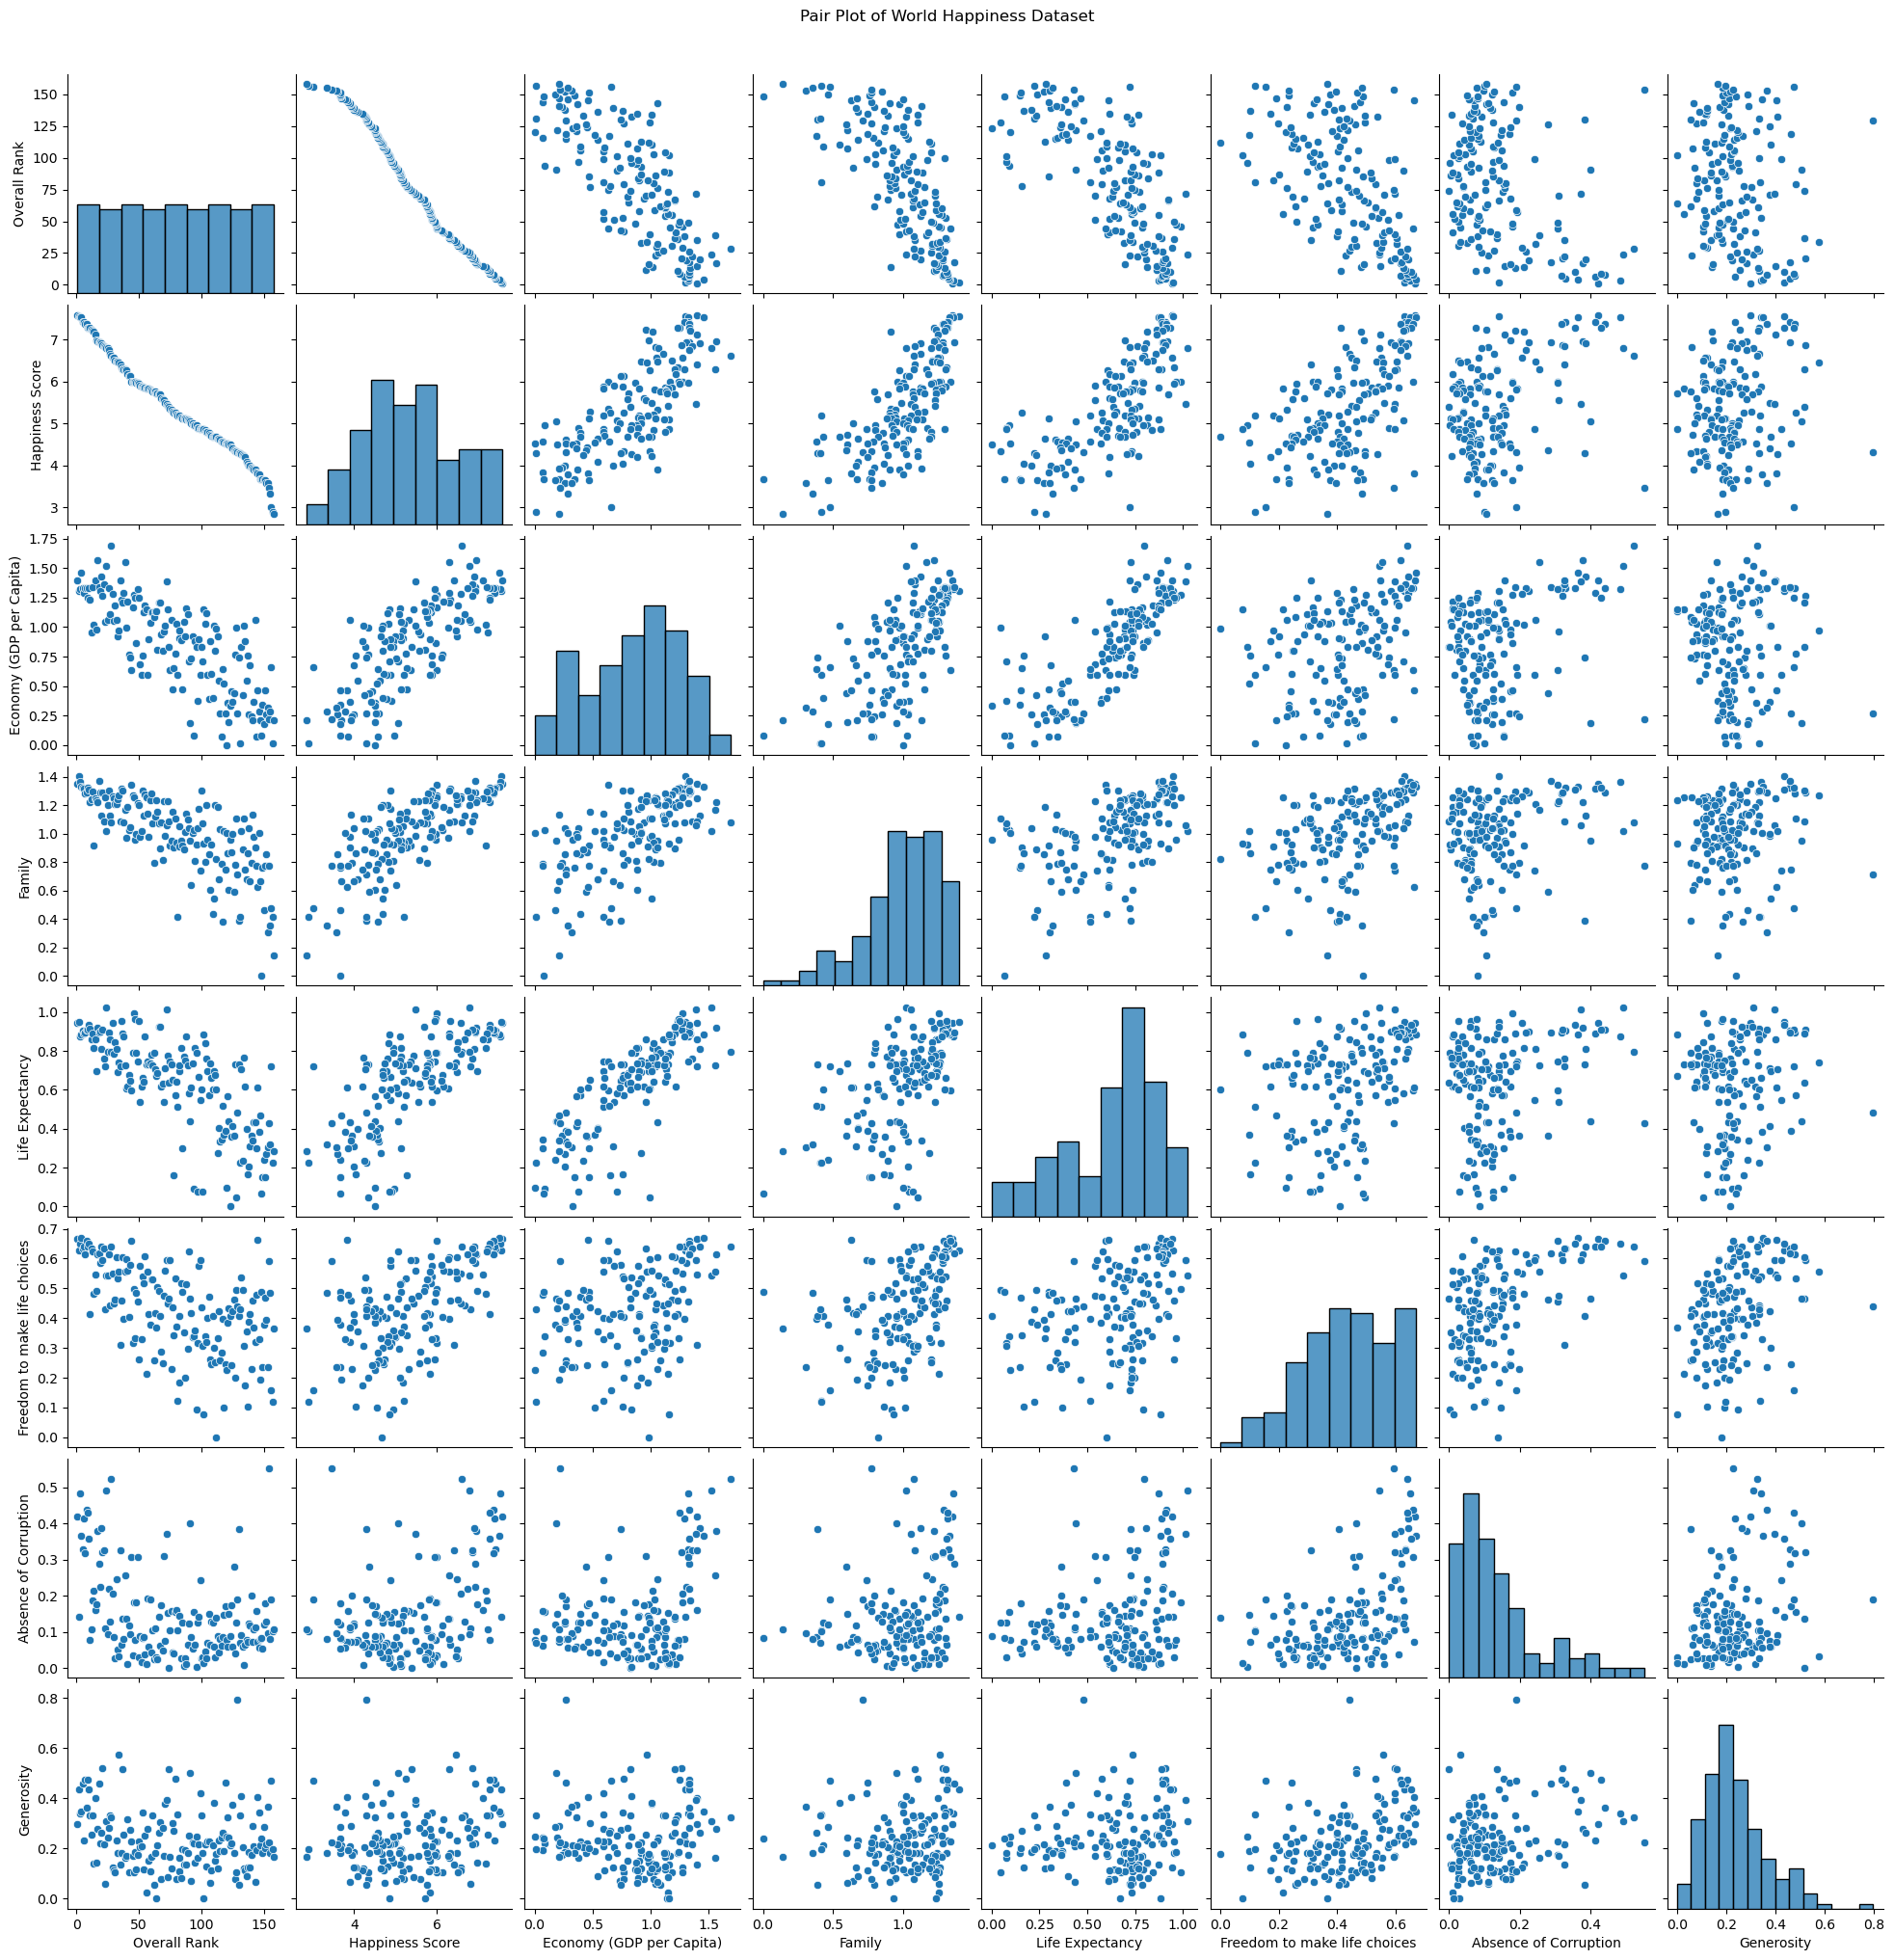

In [18]:

sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of World Happiness Dataset', y=1.02)
plt.show()

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_20537/3923574113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Happiness Score', data=top_10_df, palette='viridis')


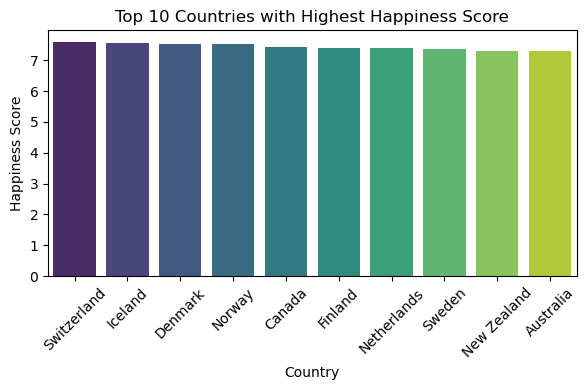

In [63]:
top_10_df = df.sort_values(by='Happiness Score', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Country', y='Happiness Score', data=top_10_df, palette='viridis')
plt.title('Top 10 Countries with Highest Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Switzerland has the highest happiness score among the countries in the dataset.


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_20537/1752607715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Happiness Score', data=bottom_10_df, palette='viridis')


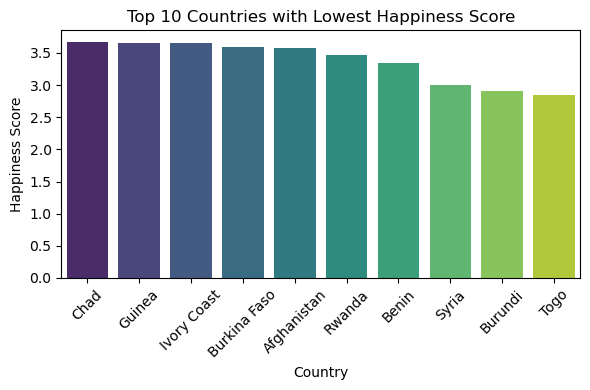

In [61]:
bottom_10_df = df.sort_values(by='Happiness Score', ascending=False).tail(10)

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Country', y='Happiness Score', data=bottom_10_df, palette='viridis')
plt.title('Top 10 Countries with Lowest Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
# Togo seems to be having the lowest happiness score among the countries.

In [85]:
# Hypothesis
# Higher GDP per capita is associated with higher happiness scores.
# Higher social support is associated with higher happiness scores.
# Higher healthy life expectancy is associated with higher happiness scores.
# Greater freedom to make life choices is associated with higher happiness scores.
# Lower perceptions of corruption are associated with higher happiness scores.

In [87]:
df.to_pickle(os.path.join(path,'Data', 'Cleaned Data', 'FinalWHData.pkl'))